## Import Dependencies & Azure Keys

In [1]:
import pandas as pd
import pyodbc
import os
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore") # Get rid of warnings        
from sklearn.decomposition import PCA
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from faker import Faker # Make Synthetic Data
from sdv.tabular import GaussianCopula
from sklearn.svm import SVR

##* Azure Keys (Don't Share) *##
server = 'sustprediction.database.windows.net'
database = 'sustainability'
username = 'capstone'
password = '{ds440@grp6}'   
driver= '{ODBC Driver 17 for SQL Server}'

## Fetch Data NYC, Chicago, Philadelphia Version 2

Retrieve NYC data from Azure SQL Database

🔑 Stores Data On RAM


In [2]:
def nyc_v2():
    """
    1. Get the dataset as dataframe.
    2. Get the column names for the dataset separately from Azure.
    """

    conn = pyodbc.connect('DRIVER='+driver+';SERVER=tcp:'+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)

    # NYC V2 Data
    nyc = conn.cursor().execute("SELECT * FROM dbo.newyork_v2").fetchall() 
    columns = conn.cursor().execute("SELECT * FROM sys.columns WHERE object_id = OBJECT_ID('dbo.newyork_v2')").fetchall()
    columns_df = pd.DataFrame([tuple(t) for t in columns])
    list_names = list(columns_df[1])
    nyc_df = pd.DataFrame([tuple(t) for t in nyc], columns = list_names)
    return nyc_df

In [3]:
def chicago_v2():
    """
    1. Get the dataset as dataframe.
    2. Get the column names for the dataset separately from Azure.
    """

    conn = pyodbc.connect('DRIVER='+driver+';SERVER=tcp:'+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)

    # NYC V2 Data
    chic = conn.cursor().execute("SELECT * FROM dbo.ChicagoFeatures_V2").fetchall() 
    columns = conn.cursor().execute("SELECT * FROM sys.columns WHERE object_id = OBJECT_ID('dbo.ChicagoFeatures_V2')").fetchall()
    columns_df = pd.DataFrame([tuple(t) for t in columns])
    list_names = list(columns_df[1])
    chic_df = pd.DataFrame([tuple(t) for t in chic], columns = list_names)
    return chic_df

In [4]:
def philly_v2():
    """
    1. Get the dataset as dataframe.
    2. Get the column names for the dataset separately from Azure.
    """

    conn = pyodbc.connect('DRIVER='+driver+';SERVER=tcp:'+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)

    # NYC V2 Data
    chic = conn.cursor().execute("SELECT * FROM dbo.PhillyFeatures_V2").fetchall() 
    columns = conn.cursor().execute("SELECT * FROM sys.columns WHERE object_id = OBJECT_ID('dbo.PhillyFeatures_V2')").fetchall()
    columns_df = pd.DataFrame([tuple(t) for t in columns])
    list_names = list(columns_df[1])
    chic_df = pd.DataFrame([tuple(t) for t in chic], columns = list_names)
    return chic_df

In [5]:
# Get Data
nyc_data = nyc_v2()
chicago_data = chicago_v2()
philly_data = philly_v2()

In [6]:
print(f"NYC Dataset:")
nyc_data.head()

NYC Dataset:


,year,week,new_york_city_diesel_average_gal,new_york_city_gas_average_gal,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,Unique_Drivers,Unique_Vehicles,Vehicles_Per_Day,Avg_Days_Vehicles_on_Road,Avg_Hours_Per_Day_Per_Vehicle,Avg_Days_Drivers_on_Road,Avg_Hours_Per_Day_Per_Driver,Avg_Minutes_Per_Trip,pm25,aqi
0,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,7464,7410,3778,15.8,3.4,15.7,3.4,35,51.666667,34.142857
1,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,72719,71484,46403,20.1,6.2,19.9,6.1,18,51.666667,34.142857
2,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,13961,12751,8389,20.4,5.4,19.0,5.3,17,51.666667,34.142857
3,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,3385,3299,1378,13.0,2.2,13.1,2.2,63,51.666667,34.142857
4,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,4377,4021,2983,23.0,5.7,21.6,5.5,128,51.666667,34.142857


In [7]:
print(f"Total Number of Columns in NYC Dataset: {len(nyc_data.columns)}")

Total Number of Columns in NYC Dataset: 34


In [8]:
print(f"Chicago Dataset:")
chicago_data.head()

Chicago Dataset:


,ID,week,month,year,County,AQI_Weekly_Measurement,City,Weather_TMAX,Weather_TMIN,Weather_AWND,...,avg_weekday_rides,avg_saturday_rides,avg_sunday_holiday_rides,Pollution_pm25,Pollution_o3,traffic_taxi_trip_miles,traffic_taxi_trip_totals,traffic_rideshare_miles,traffic_speed,traffic_bus_count
0,1,1,1,2018,Cook,9.62651296829971,Chicago,14.666667,-0.523810,10.822381,...,5747.62598425197,3250.55354330709,2213.89921259843,37.7142857142857,18.7142857142857,2.43572,12.77078,NA,NA,NA
1,2,1,1,2019,Cook,9.31444759206799,Chicago,43.571429,30.428571,9.788571,...,5215.42063492064,2968.97619047619,2214.43015873016,NA,17,2.41248,14.25623,NA,NA,NA
2,3,1,1,2020,Cook,7.49961904761905,Chicago,42.095238,28.238095,10.151905,...,5956.0168,3047.0928,2302.7584,22.8333333333333,NA,2.53537,14.34805,5.993556662,NA,NA
3,4,1,1,2021,Cook,16.980790960452,Chicago,35.666667,27.428571,7.264762,...,2147.44435483871,1544.74193548387,1072.21451612903,49,NA,5.50142,20.96997,NA,NA,NA
4,5,2,1,2018,Cook,11.8994535519126,Chicago,35.809524,19.380952,12.282857,...,NA,NA,NA,37.4285714285714,18.8571428571429,NA,NA,NA,NA,NA


In [9]:
print(f"Total Number of Columns in Chicago Dataset: {len(chicago_data.columns)}")

Total Number of Columns in Chicago Dataset: 21


In [10]:
print(f"Philly Dataset:")
philly_data.head()

Philly Dataset:


,ID,week,month,year,County,City,AQI_Weekly_Measurement,Weather_TMAX,Weather_TMIN,Weather_AWND,Weather_PRCP,traffic_bike_counts,Pollution_pm25,Pollution_o3,Pollution_no2,Pollution_so2,Pollution_co,traffic_ped_counts,traffic_vehicle_counts
0,1,1,1,2018,Philadelphia,Philadelphia,9.60100502512563,23.000000,9.142857,12.175714,0.020000,NA,38.7142857142857,22.7142857142857,11.7142857142857,NA,1.85714285714286,NA,NA
1,2,1,1,2019,Philadelphia,Philadelphia,6.76766826923077,48.714286,35.285714,8.212857,0.082857,NA,NA,17.4285714285714,11.1428571428571,NA,2.14285714285714,NA,NA
2,3,1,1,2020,Philadelphia,Philadelphia,9.12906976744186,49.000000,34.571429,7.350000,0.058571,NA,NA,18.7142857142857,14.5714285714286,NA,NA,NA,NA
3,4,1,1,2021,Philadelphia,Philadelphia,7.0555333998006,44.285714,32.857143,8.307143,0.147143,230.3,25.8571428571429,17,9.14285714285714,NA,1.85714285714286,4704.75,NA
4,5,2,1,2018,Philadelphia,Philadelphia,12.5432291666667,49.000000,27.142857,7.604286,0.211429,NA,46.2857142857143,21.4285714285714,15.8571428571429,NA,NA,NA,NA


In [11]:
print(f"Total Number of Columns in Philly Dataset: {len(philly_data.columns)}")

Total Number of Columns in Philly Dataset: 19


## Preprocessing

Steps:
1. Set License Class as Categorical and then Encode it for ML models.
2. AQI is an Integer, no decimal values.
3. Train Set - Data From 2018 to 2020, Test Set - Data From 2021 only.
4. Split Train and Test Data into Features and Labels.

### NYC

In [12]:
# Encode the License Class Column NYC
nyc_data['License_Class'] = nyc_data['License_Class'].astype('category').cat.codes
nyc_data['aqi'] = nyc_data['aqi'].astype(int)

# NYC Train - 2018 to 2020
nyc_train = nyc_data[nyc_data['year'] != 2021]

# NYC Test - 2020
nyc_test = nyc_data[nyc_data['year'] == 2021]

print(f"Train Data Years: {nyc_train.year.unique()}")
print(f"Test Data Years: {nyc_test.year.unique()}")

# Create Train and Test Splits NYC
nyc_X_train = nyc_train.drop(['pm25','aqi'], axis = 1)
nyc_y_train = nyc_train[['aqi']]
nyc_X_test = nyc_test.drop(['pm25','aqi'], axis = 1)
nyc_y_test = nyc_test[['aqi']]

print(f"X_train Shape: {nyc_X_train.shape}")
print(f"X_test Shape: {nyc_X_test.shape}")

Train Data Years: [2018 2019 2020]
Test Data Years: [2021]
X_train Shape: (936, 32)
X_test Shape: (318, 32)


### Chicago

In [13]:
# Drop City Indentifiers as they prevent the model to generalize over the dataset
chicago_data = chicago_data.drop(['County', 'City'], axis = 1)

In [14]:
chicago_data = chicago_data.replace('NA', 0)
chicago_data = chicago_data.astype(float)
chicago_data = chicago_data.replace(0, np.nan)
# NA values
chicago_data.isna().sum()

ID                            0
week                          0
month                         0
year                          0
AQI_Weekly_Measurement       18
Weather_TMAX                  0
Weather_TMIN                  0
Weather_AWND                  0
Weather_PRCP                 12
avg_weekday_rides           203
avg_saturday_rides          203
avg_sunday_holiday_rides    203
Pollution_pm25               22
Pollution_o3                 63
traffic_taxi_trip_miles     208
traffic_taxi_trip_totals    208
traffic_rideshare_miles     211
traffic_speed               207
traffic_bus_count           207
dtype: int64

In [15]:
print(f"Total Number Of Records: {len(chicago_data)}")

Total Number Of Records: 212


Looks like some columns have more than 75% of missing values - this renders them usless. We can remove them

In [16]:
chicago_data = chicago_data.drop(['avg_weekday_rides', 'avg_saturday_rides', 'avg_sunday_holiday_rides',
                                 'traffic_taxi_trip_miles', 'traffic_taxi_trip_totals', 'traffic_rideshare_miles',
                                 'traffic_speed', 'traffic_bus_count'], axis = 1)
chicago_data.head()

,ID,week,month,year,AQI_Weekly_Measurement,Weather_TMAX,Weather_TMIN,Weather_AWND,Weather_PRCP,Pollution_pm25,Pollution_o3
0,1.0,1.0,1.0,2018.0,9.626513,14.666667,-0.523810,10.822381,0.002857,37.714286,18.714286
1,2.0,1.0,1.0,2019.0,9.314448,43.571429,30.428571,9.788571,0.060476,NaN,17.000000
2,3.0,1.0,1.0,2020.0,7.499619,42.095238,28.238095,10.151905,0.001905,22.833333,NaN
3,4.0,1.0,1.0,2021.0,16.980791,35.666667,27.428571,7.264762,0.052857,49.000000,NaN
4,5.0,2.0,1.0,2018.0,11.899454,35.809524,19.380952,12.282857,0.038571,37.428571,18.857143


In [24]:
# The rest of the missing values can be forward filled

chicago_data = chicago_data.ffill(axis = 0) # column vice
print(f"Missing Values:\n {chicago_data.isna().sum()}")
chicago_data['year'] = chicago_data['year'].astype(int)
chicago_data['AQI_Weekly_Measurement'] = chicago_data['AQI_Weekly_Measurement'].astype(int)
chicago_data.head()

Missing Values:
 ID                        0
week                      0
month                     0
year                      0
AQI_Weekly_Measurement    0
Weather_TMAX              0
Weather_TMIN              0
Weather_AWND              0
Weather_PRCP              0
Pollution_pm25            0
Pollution_o3              0
dtype: int64


,ID,week,month,year,AQI_Weekly_Measurement,Weather_TMAX,Weather_TMIN,Weather_AWND,Weather_PRCP,Pollution_pm25,Pollution_o3
0,1.0,1.0,1.0,2018,9,14.666667,-0.523810,10.822381,0.002857,37.714286,18.714286
1,2.0,1.0,1.0,2019,9,43.571429,30.428571,9.788571,0.060476,37.714286,17.000000
2,3.0,1.0,1.0,2020,7,42.095238,28.238095,10.151905,0.001905,22.833333,17.000000
3,4.0,1.0,1.0,2021,16,35.666667,27.428571,7.264762,0.052857,49.000000,17.000000
4,5.0,2.0,1.0,2018,11,35.809524,19.380952,12.282857,0.038571,37.428571,18.857143


In [25]:
# Chicago Train - 2018 to 2020
chicago_train = chicago_data[chicago_data['year'] != 2021]

# Chicago Test - 2020
chicago_test = chicago_data[chicago_data['year'] == 2021]

print(f"Train Data Years: {chicago_train.year.unique()}")
print(f"Test Data Years: {chicago_test.year.unique()}")

# Create Train and Test Splits NYC
chicago_X_train = chicago_train.drop(['Pollution_pm25','AQI_Weekly_Measurement'], axis = 1)
chicago_y_train = chicago_train[['AQI_Weekly_Measurement']]
chicago_X_test = chicago_test.drop(['Pollution_pm25','AQI_Weekly_Measurement'], axis = 1)
chicago_y_test = chicago_test[['AQI_Weekly_Measurement']]

print(f"X_train Shape: {chicago_X_train.shape}")
print(f"X_test Shape: {chicago_X_test.shape}")

Train Data Years: [2018 2019 2020]
Test Data Years: [2021]
X_train Shape: (159, 9)
X_test Shape: (53, 9)


### Philly

In [29]:
# Drop City Indentifiers as they prevent the model to generalize over the dataset
philly_data = philly_data.drop(['County', 'City'], axis = 1)
philly_data = philly_data.replace('NA', 0)
philly_data = philly_data.astype(float)
philly_data = philly_data.replace(0, np.nan)
# NA values
philly_data.isna().sum()

ID                          0
week                        0
month                       0
year                        0
AQI_Weekly_Measurement     20
Weather_TMAX                0
Weather_TMIN                0
Weather_AWND                0
Weather_PRCP               12
traffic_bike_counts       167
Pollution_pm25             39
Pollution_o3               31
Pollution_no2              32
Pollution_so2             199
Pollution_co               59
traffic_ped_counts        173
traffic_vehicle_counts    183
dtype: int64

In [30]:
print(f"Total Number of Records: {len(philly_data)}")

Total Number of Records: 212


In [31]:
# Drop columns with almost all records missing
philly_data = philly_data.drop(['traffic_bike_counts', 'Pollution_so2', 'Pollution_pm25', 
                                'traffic_ped_counts', 'traffic_vehicle_counts'], axis = 1)
philly_data.head()

,ID,week,month,year,AQI_Weekly_Measurement,Weather_TMAX,Weather_TMIN,Weather_AWND,Weather_PRCP,Pollution_o3,Pollution_no2,Pollution_co
0,1.0,1.0,1.0,2018.0,9.601005,23.000000,9.142857,12.175714,0.020000,22.714286,11.714286,1.857143
1,2.0,1.0,1.0,2019.0,6.767668,48.714286,35.285714,8.212857,0.082857,17.428571,11.142857,2.142857
2,3.0,1.0,1.0,2020.0,9.129070,49.000000,34.571429,7.350000,0.058571,18.714286,14.571429,NaN
3,4.0,1.0,1.0,2021.0,7.055533,44.285714,32.857143,8.307143,0.147143,17.000000,9.142857,1.857143
4,5.0,2.0,1.0,2018.0,12.543229,49.000000,27.142857,7.604286,0.211429,21.428571,15.857143,NaN


In [32]:
# The rest of the missing values can be forward filled

philly_data = philly_data.ffill(axis = 0) # column vice
print(f"Missing Values:\n {philly_data.isna().sum()}")
philly_data['year'] = philly_data['year'].astype(int)
philly_data['AQI_Weekly_Measurement'] = philly_data['AQI_Weekly_Measurement'].astype(int)
philly_data.head()

Missing Values:
 ID                        0
week                      0
month                     0
year                      0
AQI_Weekly_Measurement    0
Weather_TMAX              0
Weather_TMIN              0
Weather_AWND              0
Weather_PRCP              0
Pollution_o3              0
Pollution_no2             0
Pollution_co              0
dtype: int64


,ID,week,month,year,AQI_Weekly_Measurement,Weather_TMAX,Weather_TMIN,Weather_AWND,Weather_PRCP,Pollution_o3,Pollution_no2,Pollution_co
0,1.0,1.0,1.0,2018,9,23.000000,9.142857,12.175714,0.020000,22.714286,11.714286,1.857143
1,2.0,1.0,1.0,2019,6,48.714286,35.285714,8.212857,0.082857,17.428571,11.142857,2.142857
2,3.0,1.0,1.0,2020,9,49.000000,34.571429,7.350000,0.058571,18.714286,14.571429,2.142857
3,4.0,1.0,1.0,2021,7,44.285714,32.857143,8.307143,0.147143,17.000000,9.142857,1.857143
4,5.0,2.0,1.0,2018,12,49.000000,27.142857,7.604286,0.211429,21.428571,15.857143,1.857143


In [34]:
# Philly Train - 2018 to 2020
philly_train = philly_data[philly_data['year'] != 2021]

# Philly Test - 2020
philly_test = philly_data[philly_data['year'] == 2021]

print(f"Train Data Years: {philly_train.year.unique()}")
print(f"Test Data Years: {philly_test.year.unique()}")

# Create Train and Test Splits NYC
philly_X_train = philly_train.drop(['AQI_Weekly_Measurement'], axis = 1)
philly_y_train = philly_train[['AQI_Weekly_Measurement']]
philly_X_test = philly_test.drop(['AQI_Weekly_Measurement'], axis = 1)
philly_y_test = philly_test[['AQI_Weekly_Measurement']]

print(f"X_train Shape: {philly_X_train.shape}")
print(f"X_test Shape: {philly_X_test.shape}")

Train Data Years: [2018 2019 2020]
Test Data Years: [2021]
X_train Shape: (159, 11)
X_test Shape: (53, 11)


### Standard Scaler

Scale the data for the model

In [35]:
from sklearn.preprocessing import StandardScaler

def scale_data(X_train, y_train, X_test, y_test):
    
    """
    Input: training and testing splits.
    Output: Scaled training and testing splits.
    """
    X_train = StandardScaler().fit_transform(X_train)
    y_train = StandardScaler().fit_transform(y_train)
    X_test = StandardScaler().fit_transform(X_test)
    y_test = StandardScaler().fit_transform(y_test)
    
    return X_train, y_train, X_test, y_test

## Functions

### Loss Curves Plot

In [36]:
def plot_loss(history):
    """
    Loss Curves of the Models - Neural Nets
    """
    plt.plot(history.history['loss'], label = 'loss')
    #plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

## Source City NYC Models

In [38]:
scaled_nyc_X_train, scaled_nyc_y_train, scaled_nyc_X_test, scaled_nyc_y_test = scale_data(nyc_X_train, nyc_y_train, nyc_X_test, nyc_y_test)

### Model 1: Random Forest Regressor

In [39]:
np.random.seed(44)
rfr = RandomForestRegressor(n_estimators=200, criterion="mse",
                            min_samples_leaf=3, min_samples_split=3, 
                            max_depth=5, random_state = 44).fit(scaled_nyc_X_train, scaled_nyc_y_train)

print(f"Random Forest Regressor Score: {rfr.score(scaled_nyc_X_test, scaled_nyc_y_test) * 100}")

Random Forest Regressor Score: 3.9091901112385585


### Model 2: SVM

In [40]:
np.random.seed(44)
regressor = SVR(kernel = 'rbf').fit(scaled_nyc_X_train, scaled_nyc_y_train)
print(f"Support Vector Machines: {regressor.score(scaled_nyc_X_test, scaled_nyc_y_test) * 100}")

Support Vector Machines: -18.846528996700318


### Model 3: Sequential

In [41]:
# Build Fully Connect Neural Net using Sequential API
tf.random.set_seed(44)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(500, input_dim=32, activation= "relu"))
model.add(tf.keras.layers.Dense(500, activation = "relu"))
model.add(tf.keras.layers.Dense(100, activation= "relu"))
model.add(tf.keras.layers.Dense(50, activation= "sigmoid"))
model.add(tf.keras.layers.Dense(1))

2022-03-28 17:59:10.598031: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               16500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 100)               50100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 322,201
Trainable params: 322,201
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile and Fit Model
tf.random.set_seed(44)
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history_1 = model.fit(scaled_nyc_X_train, scaled_nyc_y_train, epochs=50, verbose = 0)

In [44]:
# Evaluate Model on Test Data
model.evaluate(scaled_nyc_X_test, scaled_nyc_y_test)

10/10 [==============================] - 0s 2ms/step - loss: 1.1399 - mean_squared_error: 1.1399


[1.139925241470337, 1.139925241470337]

In [45]:
# Make Predictions
predictions = model.predict(scaled_nyc_X_test)

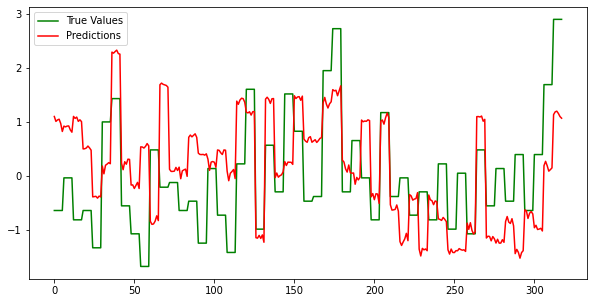

In [47]:
# Plot True Values and Predictions
plt.figure(figsize = (10,5))
plt.plot(scaled_nyc_y_test, c = 'green', label = "True Values")
plt.plot(predictions, c = "red", label = "Predictions")
plt.legend()
plt.show()

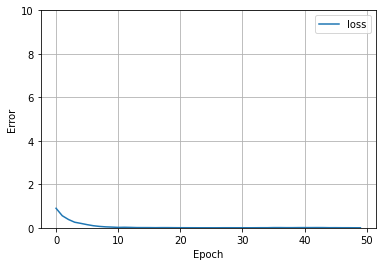

In [48]:
# Plot Loss Curves
plot_loss(history_1)

In [49]:
# Save Model
model.save('Models/Model_1')

2022-03-28 17:59:46.985546: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: Models/Model_1/assets


## Preprocess 
Create Synthetic Data Using `Train` Data and Check Chi Squared Distribution and Plot the Distribution

In [50]:
# SDV 
model_copula = GaussianCopula()
model_copula.fit(nyc_train)

In [51]:
# Create a Dataset with the same number or records as training data
np.random.seed(44)
sample_data = model_copula.sample(936)
sample_data.head()

,year,week,new_york_city_diesel_average_gal,new_york_city_gas_average_gal,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,Unique_Drivers,Unique_Vehicles,Vehicles_Per_Day,Avg_Days_Vehicles_on_Road,Avg_Hours_Per_Day_Per_Vehicle,Avg_Days_Drivers_on_Road,Avg_Hours_Per_Day_Per_Driver,Avg_Minutes_Per_Trip,pm25,aqi
0,2020,46,3.45,2.726,69.960045,55.771458,63.915050,70.442061,54.320028,63.284315,...,715,355,177,15.5,2.0,17.6,3.3,187,18.100922,13
1,2019,48,3.36,2.441,61.785161,43.767806,53.910975,57.322831,39.137632,50.368255,...,1506,499,433,27.5,8.1,22.3,7.9,187,43.480374,36
2,2020,1,3.02,2.475,35.695044,34.002144,28.506260,31.862311,27.913897,22.886592,...,3415,2772,1756,19.9,6.9,16.1,5.8,37,30.555366,28
3,2019,6,3.30,2.413,58.365459,35.302970,52.382284,55.322803,27.846409,47.561597,...,7555,8393,5614,20.1,6.5,17.6,7.0,69,55.818691,40
4,2019,6,3.45,2.722,43.931946,25.740418,38.472756,39.386097,15.951711,32.226404,...,21811,23387,20021,20.5,5.4,22.3,6.7,53,39.798299,34


In [52]:
nyc_train.head()

,year,week,new_york_city_diesel_average_gal,new_york_city_gas_average_gal,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,Unique_Drivers,Unique_Vehicles,Vehicles_Per_Day,Avg_Days_Vehicles_on_Road,Avg_Hours_Per_Day_Per_Vehicle,Avg_Days_Drivers_on_Road,Avg_Hours_Per_Day_Per_Driver,Avg_Minutes_Per_Trip,pm25,aqi
0,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,7464,7410,3778,15.8,3.4,15.7,3.4,35,51.666667,34
1,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,72719,71484,46403,20.1,6.2,19.9,6.1,18,51.666667,34
2,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,13961,12751,8389,20.4,5.4,19.0,5.3,17,51.666667,34
3,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,3385,3299,1378,13.0,2.2,13.1,2.2,63,51.666667,34
4,2018,1,3.15,2.72,22.383333,12.433333,17.166667,13.2,-2.583333,4.55,...,4377,4021,2983,23.0,5.7,21.6,5.5,128,51.666667,34


### EDA

In [53]:
print(f"Distribution of Data By Year Train Data:\n{nyc_train.year.value_counts()}")
print(f"Distribution of Data By Year Train Data:\n{sample_data.year.value_counts()}")

print(f"Mean of AQI Train Data: {nyc_train.aqi.mean()}")
print(f"Mean of AQI Sample Data: {sample_data.aqi.mean()}")

Distribution of Data By Year Train Data:
2018    318
2020    318
2019    300
Name: year, dtype: int64
Distribution of Data By Year Train Data:
2019    482
2018    228
2020    226
Name: year, dtype: int64
Mean of AQI Train Data: 33.35897435897436
Mean of AQI Sample Data: 33.19337606837607


In [54]:
# Kolmogorov-Smirnov and Chi-Squared tests to compare train and sample data
from sdv.evaluation import evaluate
evaluate(sample_data, nyc_train, metrics = ['CSTest', 'KSTest'], aggregate = False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,CSTest,Chi-Squared,NaN,NaN,0.0,1.0,MAXIMIZE,"Cannot find fields of types ('boolean', 'categ..."
1,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.894294,0.894294,0.0,1.0,MAXIMIZE,None


### Model
1. Create X and Y sets from Sample Data
2. Use the saved model to evalute the sample data

In [56]:
# Scale Data
nyc_sample_X_train = sample_data.drop(['pm25','aqi'], axis = 1)
nyc_sample_y_train = sample_data[['aqi']]
nyc_sample_X_train = StandardScaler().fit_transform(nyc_sample_X_train)
nyc_sample_y_train = StandardScaler().fit_transform(nyc_sample_y_train)

In [57]:
# Evaluate Data
loaded_model = tf.keras.models.load_model('Models/Model_1')

In [58]:
loaded_model.evaluate(nyc_sample_X_train, nyc_sample_y_train)

30/30 [==============================] - 0s 2ms/step - loss: 1.2419 - mean_squared_error: 1.2419


[1.241913080215454, 1.241913080215454]

The MSE is very comparable to training data MSE

#### Combine Datasets and Model and Evaluate on Test Data

In [59]:
nyc_combined_train = pd.concat([nyc_train, sample_data])
print(f"Length of Training Data: {len(nyc_combined_train)}")

# Shuffle Data
nyc_combined_train = nyc_combined_train.sample(frac=1).reset_index(drop=True)

Length of Training Data: 1872


In [61]:
# Split and Scale Data
nyc_combined_X_train = nyc_combined_train.drop(['pm25','aqi'], axis = 1)
nyc_combined_y_train = nyc_combined_train[['aqi']]
nyc_combined_X_train = StandardScaler().fit_transform(nyc_combined_X_train)
nyc_combined_y_train = StandardScaler().fit_transform(nyc_combined_y_train)

In [62]:
# Compile and Fit Model
tf.random.set_seed(44)
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history_2 = model.fit(nyc_combined_X_train, nyc_combined_y_train, epochs=50, verbose = 0)

In [63]:
# Evaluate Model
model.evaluate(scaled_nyc_X_test, scaled_nyc_y_test)

10/10 [==============================] - 1s 2ms/step - loss: 0.8812 - mean_squared_error: 0.8812


[0.8811631798744202, 0.8811631798744202]

In [64]:
predictions_2 = model.predict(scaled_nyc_X_test)

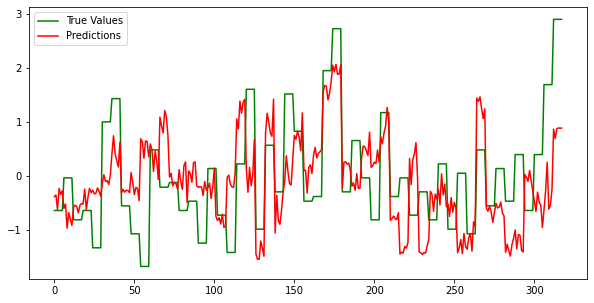

In [66]:
# Plot True Values and Predictions
plt.figure(figsize = (10,5))
plt.plot(scaled_nyc_y_test, c = 'green', label = "True Values")
plt.plot(predictions_2, c = "red", label = "Predictions")
plt.legend()
plt.show()

In [67]:
# Save Model
model.save('Models/Model_2')

INFO:tensorflow:Assets written to: Models/Model_2/assets


### Model 4: Sequential From Model 3

In [272]:
# Build Fully Connect Neural Net using Functional API
tf.random.set_seed(44)

model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(500, input_dim=32, activation= "relu"))
model_4.add(tf.keras.layers.Dense(500, activation = "relu"))
model_4.add(tf.keras.layers.Dense(500, activation = "relu"))
model_4.add(tf.keras.layers.Dense(250, activation= "relu"))
model_4.add(tf.keras.layers.Dense(250, activation= "relu"))
model_4.add(tf.keras.layers.Dense(100, activation= "relu"))
model_4.add(tf.keras.layers.Dense(100, activation= "relu"))
model_4.add(tf.keras.layers.Dense(50, activation= "relu"))
model_4.add(tf.keras.layers.Dense(1))    

In [264]:
model_4.compile(loss= "mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

In [265]:
history_4 = model_4.fit(nyc_combined_X_train, nyc_combined_y_train, epochs=50, verbose = 0)

In [266]:
model_4.evaluate(scaled_nyc_X_test, scaled_nyc_y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.8957 - mean_squared_error: 0.8957


[0.8957338929176331, 0.8957338929176331]

In [267]:
predictions_4 = model_4.predict(scaled_nyc_X_test)

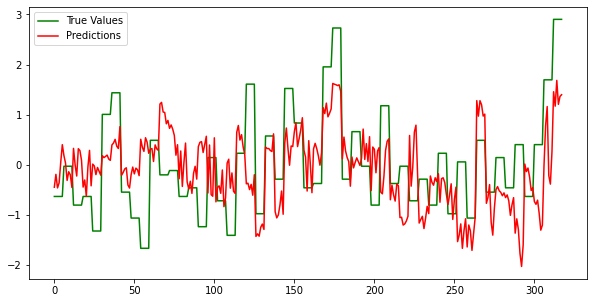

In [268]:
# Plot True Values and Predictions
plt.figure(figsize = (10,5))
plt.plot(scaled_nyc_y_test, c = 'green', label = "True Values")
plt.plot(predictions_4, c = "red", label = "Predictions")
plt.legend()
plt.show()

In [269]:
model_4.save('Models/Model_4')

INFO:tensorflow:Assets written to: Models/Model_4/assets


**Model 4 is the best model so far - Transfer model knowledge to Chicago and Philly**

## Transfer Learning

Transfer Knowledge from NYC Model 4 to Chicago and Philly

In [ ]:
# Create a Custom Nueral Net API using Model 4

def SourceCityNet(include_top = True,
             weights='imagenet',
             input_tensor=None,
             input_shape=None,
             pooling=None,
             classes=1000,
             **kwargs):
    
    
    if input_tensor is None:
        
        X_train_input = tf.keras.layers.Input(shape = input_shape)
        
    else:
        
        if not backend.is_keras_tensor(input_tensor):
            
            X_train_input = tf.keras.layers.Input(tensor=input_tensor, 
                                                  shape=input_shape)
            
        else:
            
            X_train_input = input_tensor
                
                
    x = tf.keras.layers.Dense(500, activation= "relu")(X_train_input)
    x = tf.keras.layers.Dense(500, activation = "relu")(x)
    x = tf.keras.layers.Dense(500, activation = "relu")(x)
    x = tf.keras.layers.Dense(250, activation= "relu")(x)
    x = tf.keras.layers.Dense(250, activation= "relu")(x)
    x = tf.keras.layers.Dense(100, activation= "relu")(x)
    x = tf.keras.layers.Dense(100, activation= "relu")(x)
    
    
    x = tf.keras.layers.Dense(50, activation= "relu")(x)
    x = tf.keras.layers.Dense(1)(x)
            
            



In [ ]:
model_tranfer_test.evaluate(scaled_nyc_X_test, scaled_nyc_y_test)

### Chicago

In [282]:
# -- Scale Data using Standard Scaler Function -- #

scaled_chicago_X_train, scaled_chicago_y_train, scaled_chicago_X_test, scaled_chicago_y_test = scale_data(chicago_X_train, chicago_y_train, chicago_X_test, chicago_y_test)

#### Transfer Model 4 on Scaled Chicago Data